<>:70: SyntaxWarning: invalid escape sequence '\m'
<>:75: SyntaxWarning: invalid escape sequence '\m'
<>:80: SyntaxWarning: invalid escape sequence '\m'
<>:70: SyntaxWarning: invalid escape sequence '\m'
<>:75: SyntaxWarning: invalid escape sequence '\m'
<>:80: SyntaxWarning: invalid escape sequence '\m'
/var/folders/4d/rzxz26xj0z5b8wy1gj72mcz80000gn/T/ipykernel_74105/1690584557.py:70: SyntaxWarning: invalid escape sequence '\m'
  ax.text(1.01, -0.5645858, 'Adj. $E_{\mathrm{F}}$', fontsize=35, va='center', ha='left',
/var/folders/4d/rzxz26xj0z5b8wy1gj72mcz80000gn/T/ipykernel_74105/1690584557.py:75: SyntaxWarning: invalid escape sequence '\m'
  ax.text(1.01, -1.0402164, 'Adj. $E_{\mathrm{F}}$', fontsize=35, va='center', ha='left',
/var/folders/4d/rzxz26xj0z5b8wy1gj72mcz80000gn/T/ipykernel_74105/1690584557.py:80: SyntaxWarning: invalid escape sequence '\m'
  ax.text(1.01, -1.2770532, 'Adj. $E_{\mathrm{F}}$', fontsize=35, va='center', ha='left',


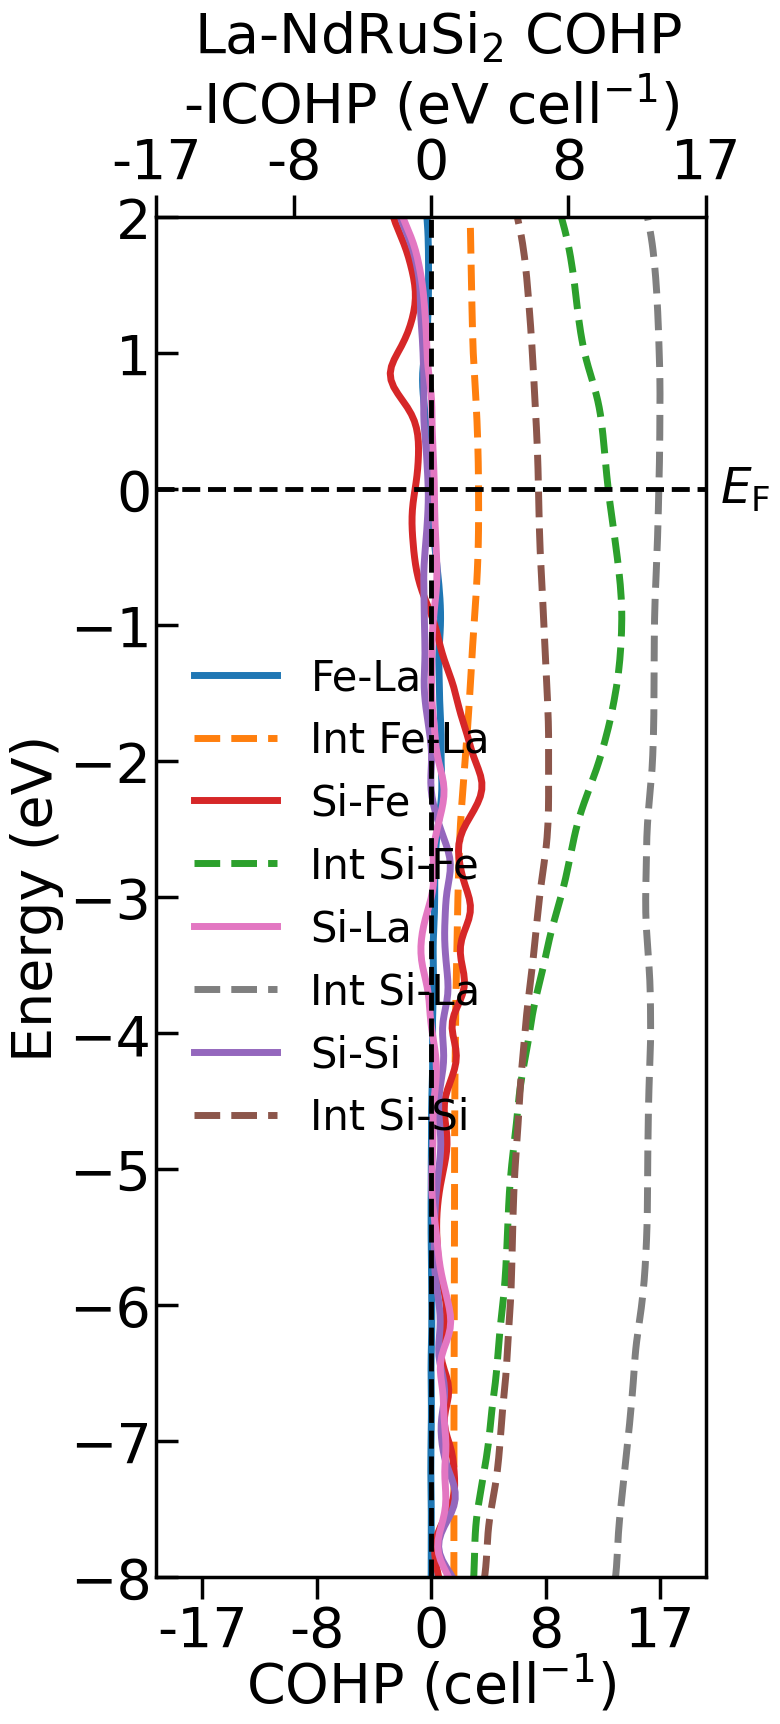

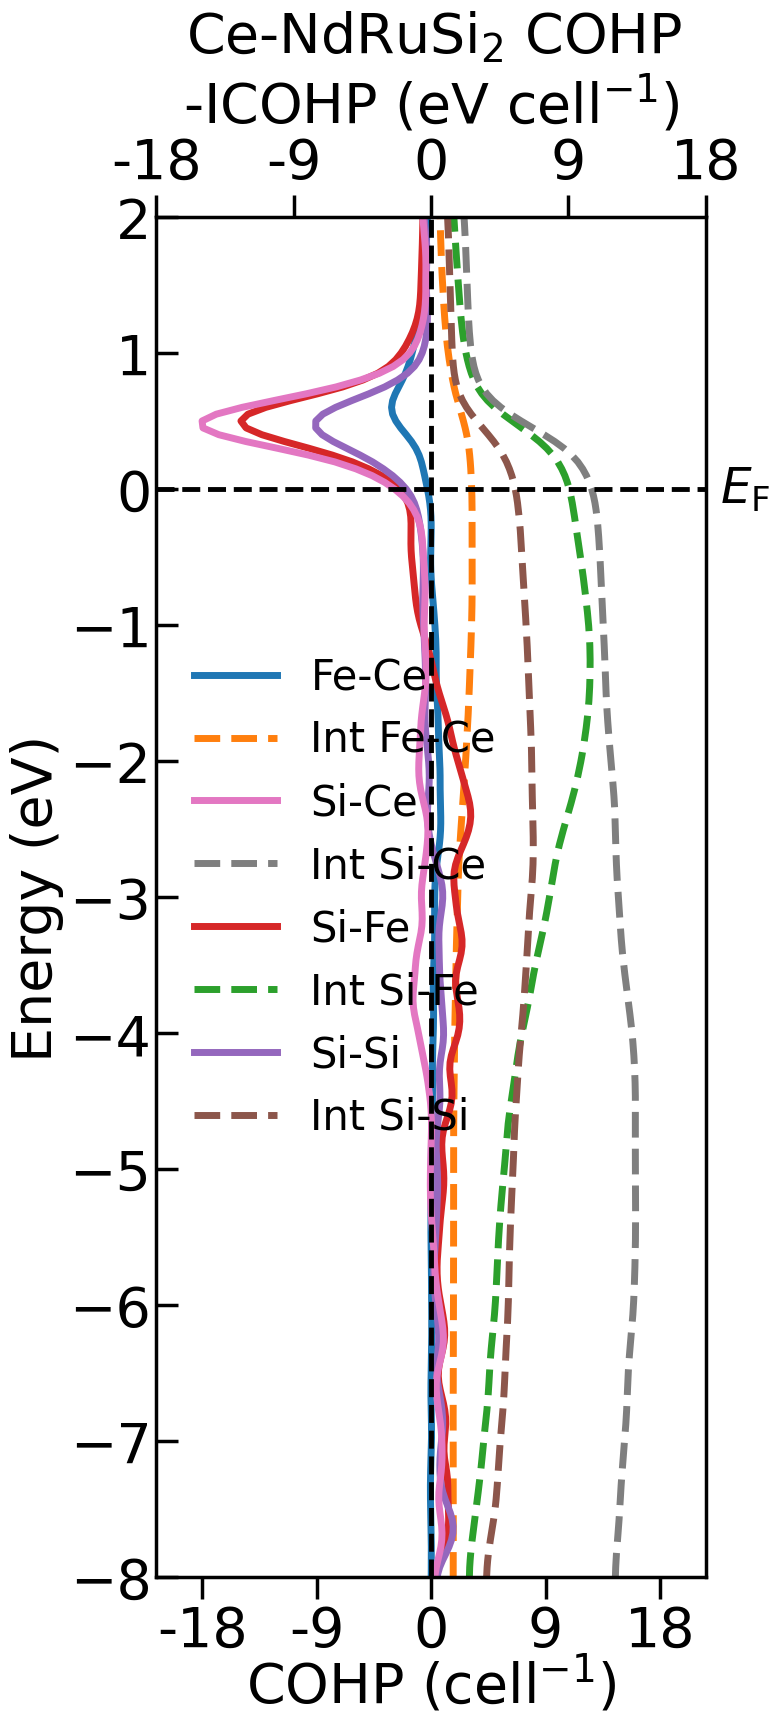

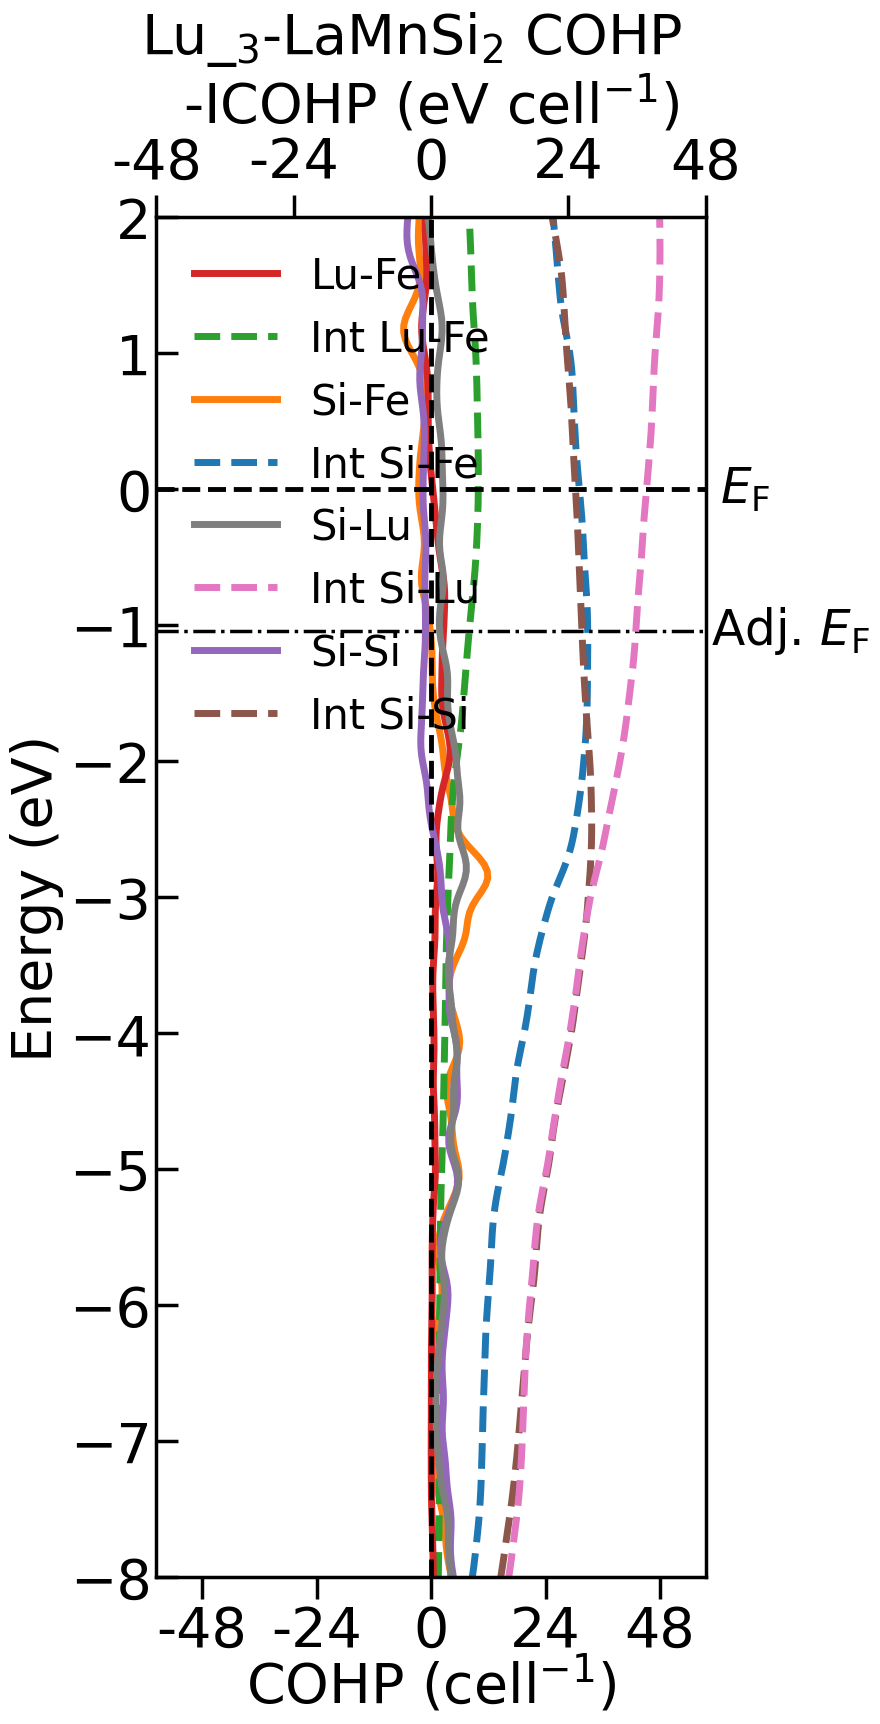

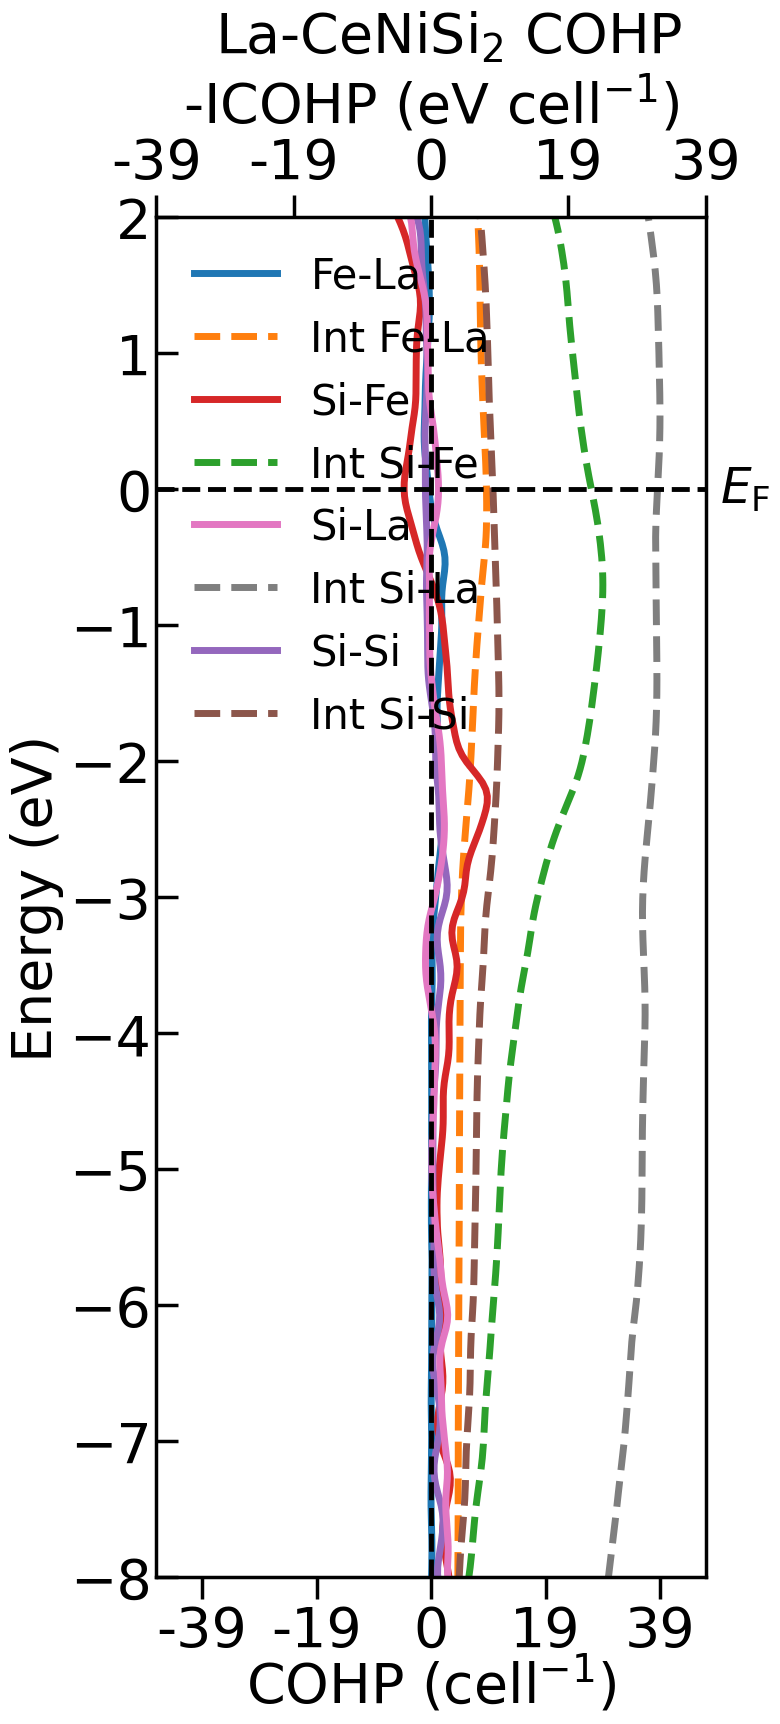

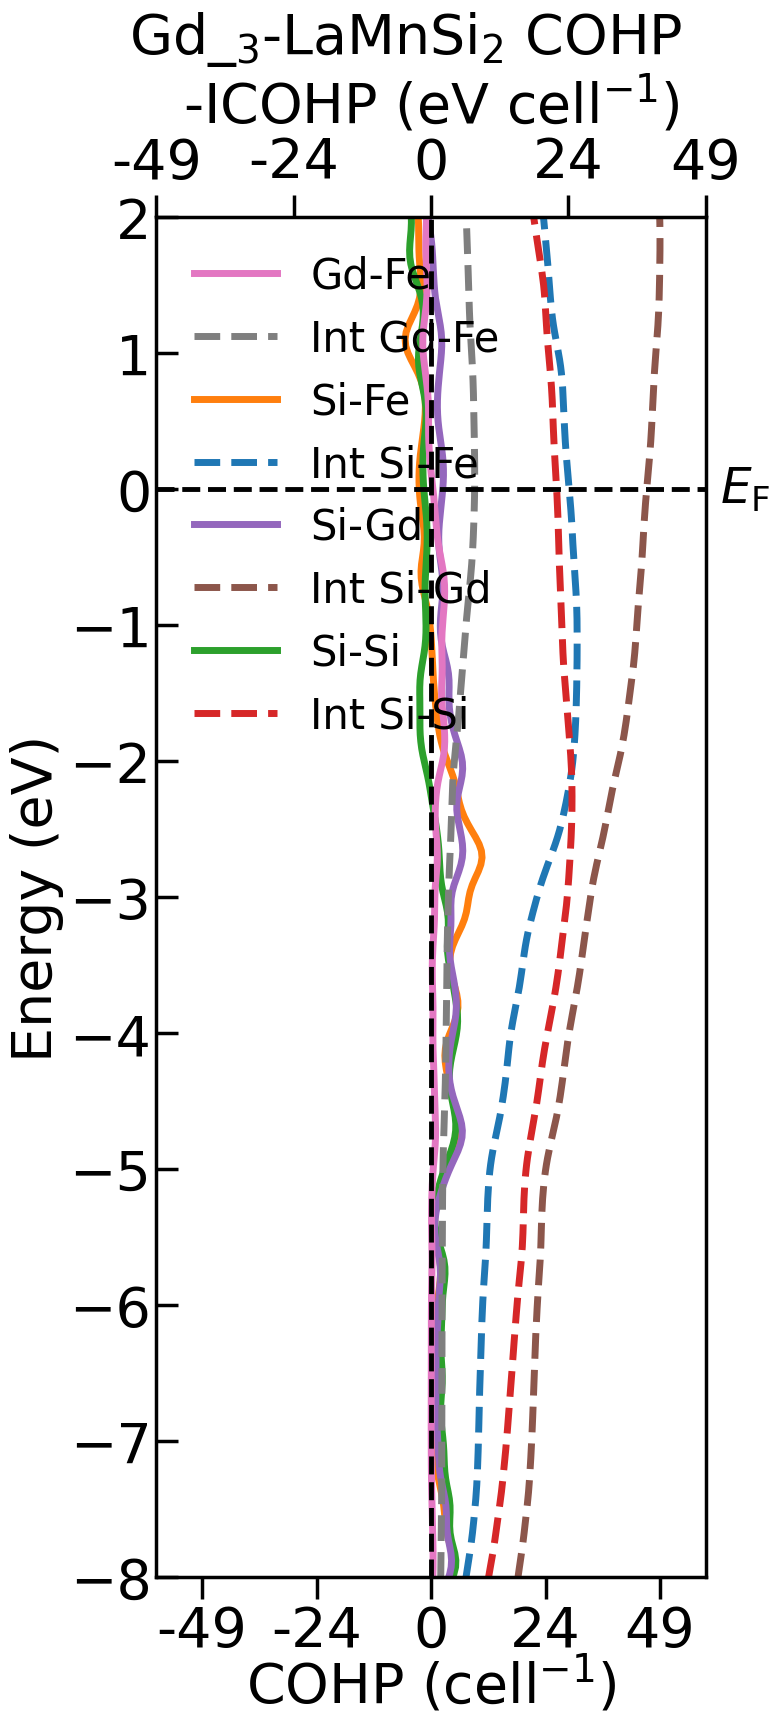

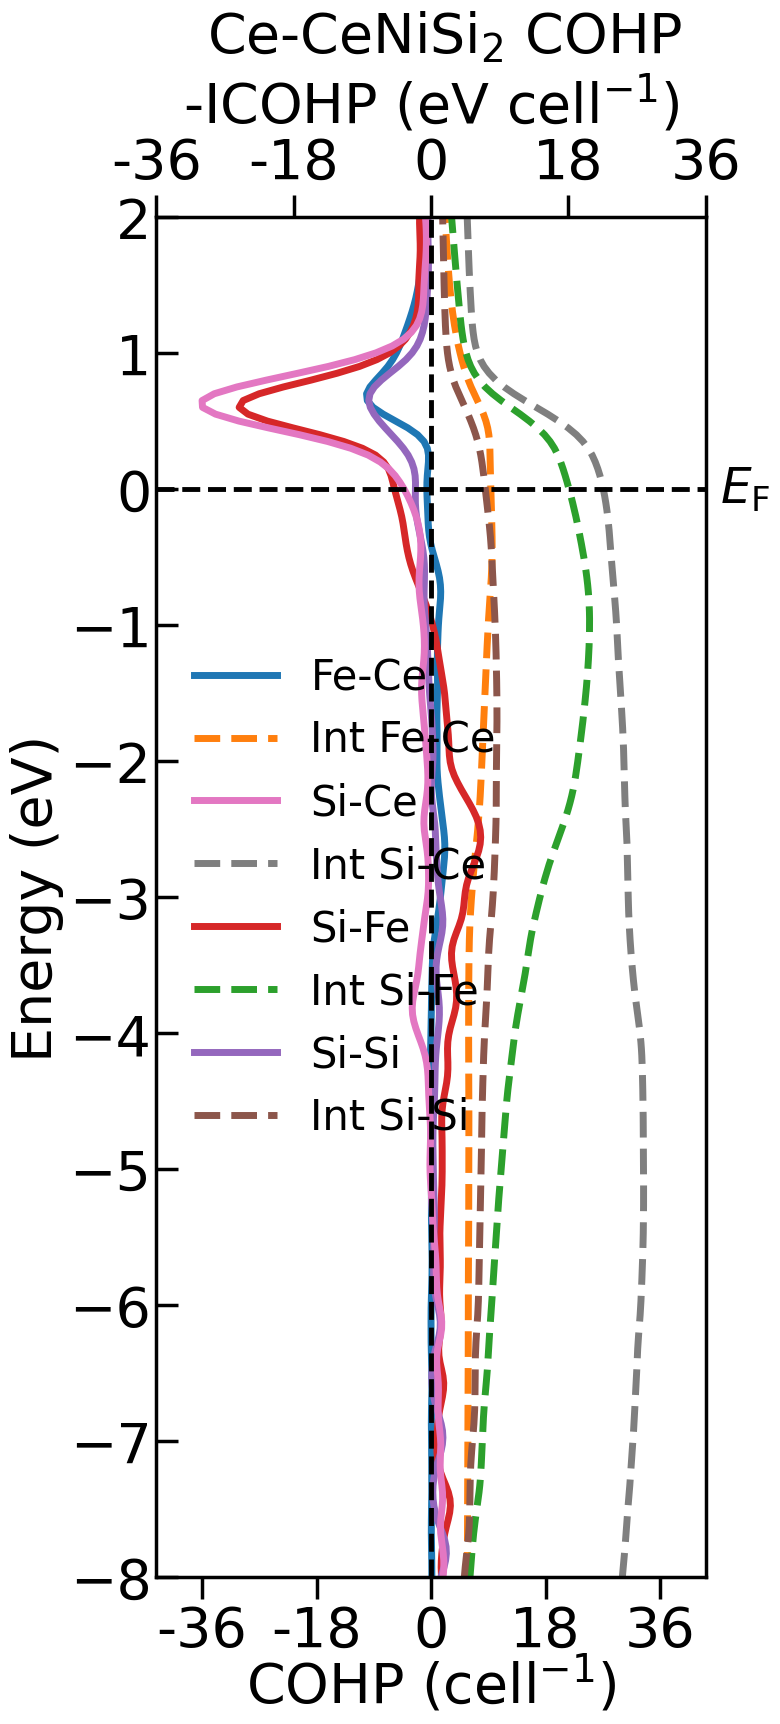

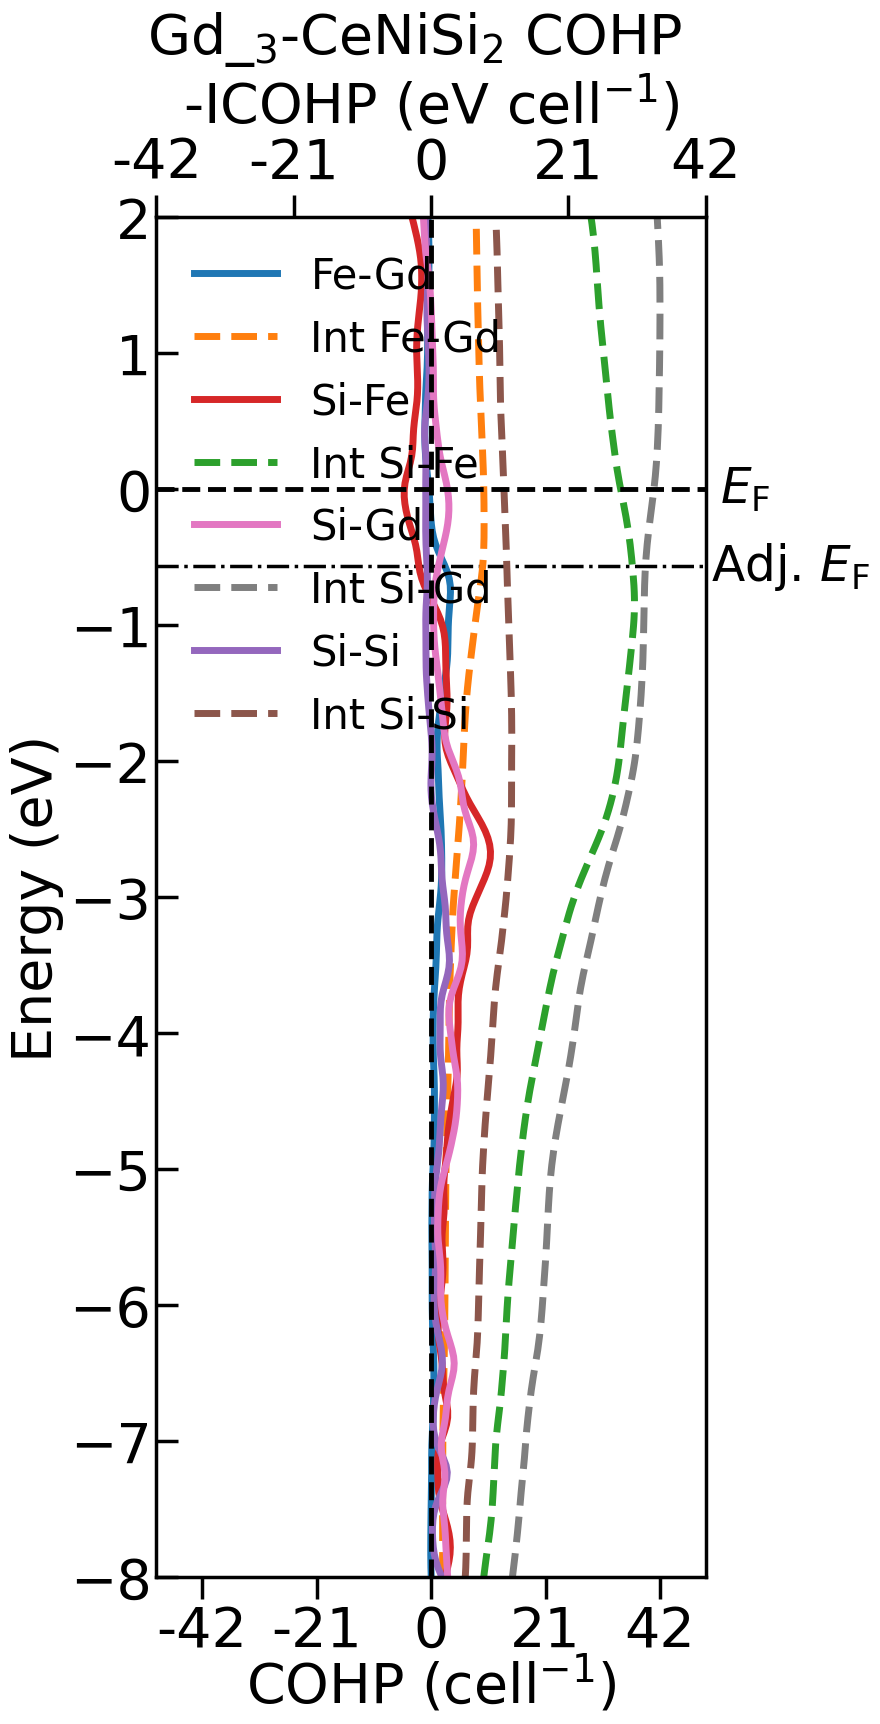

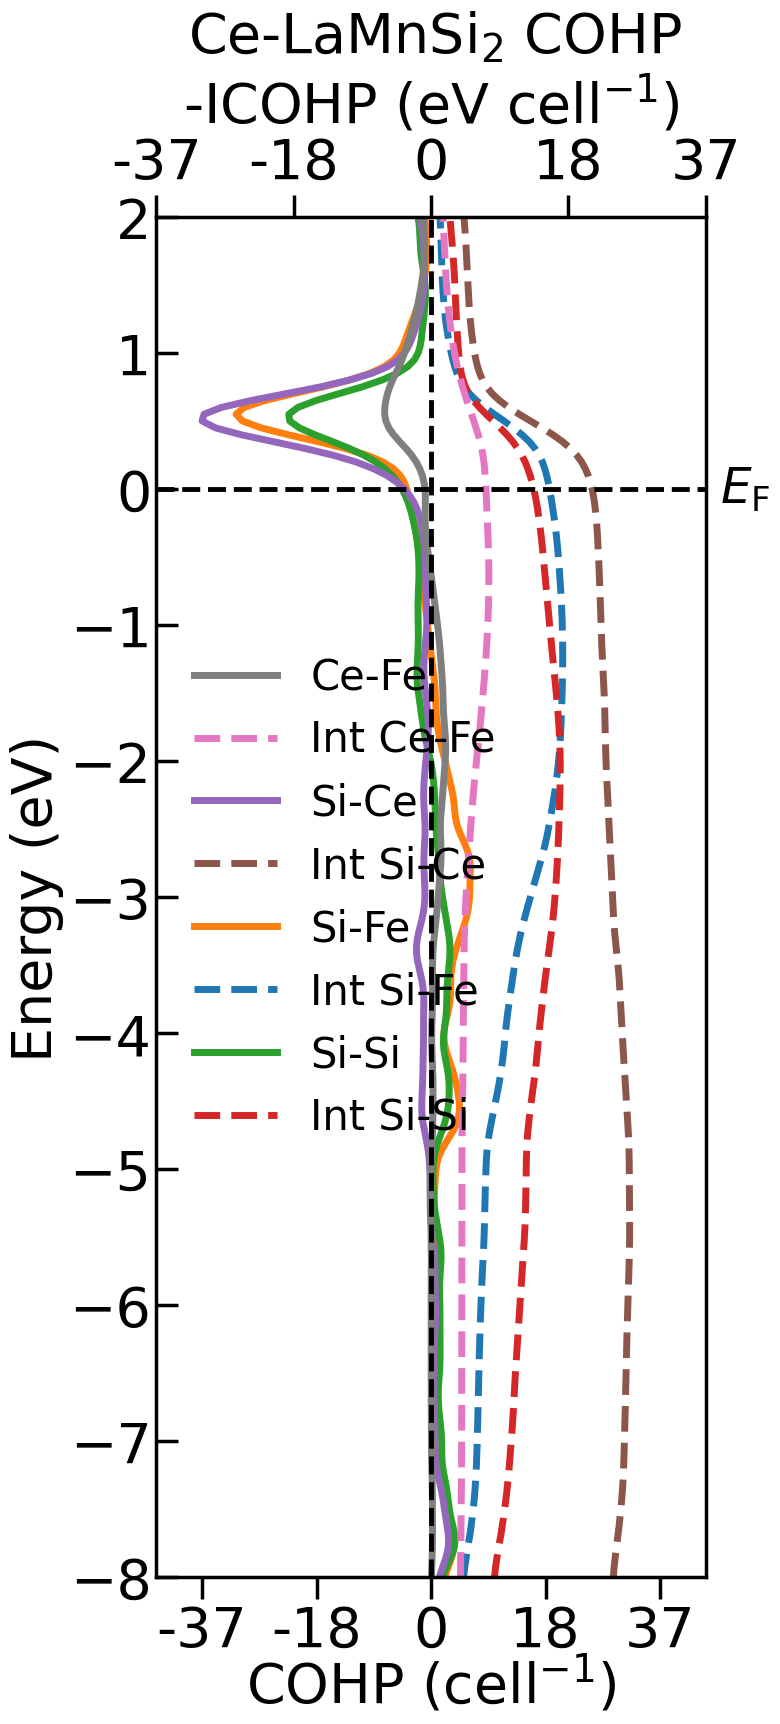

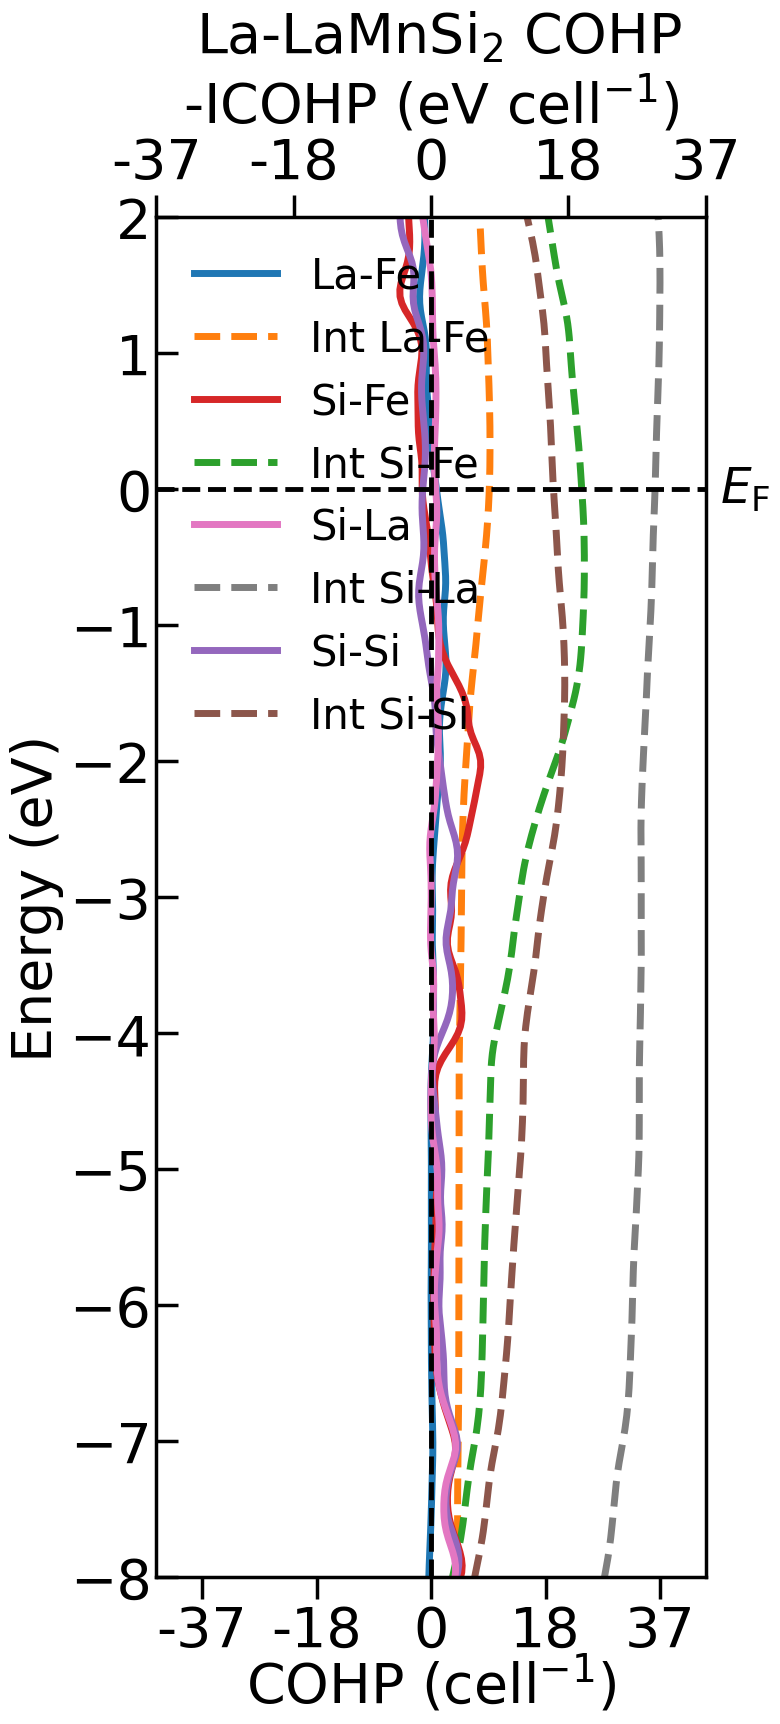

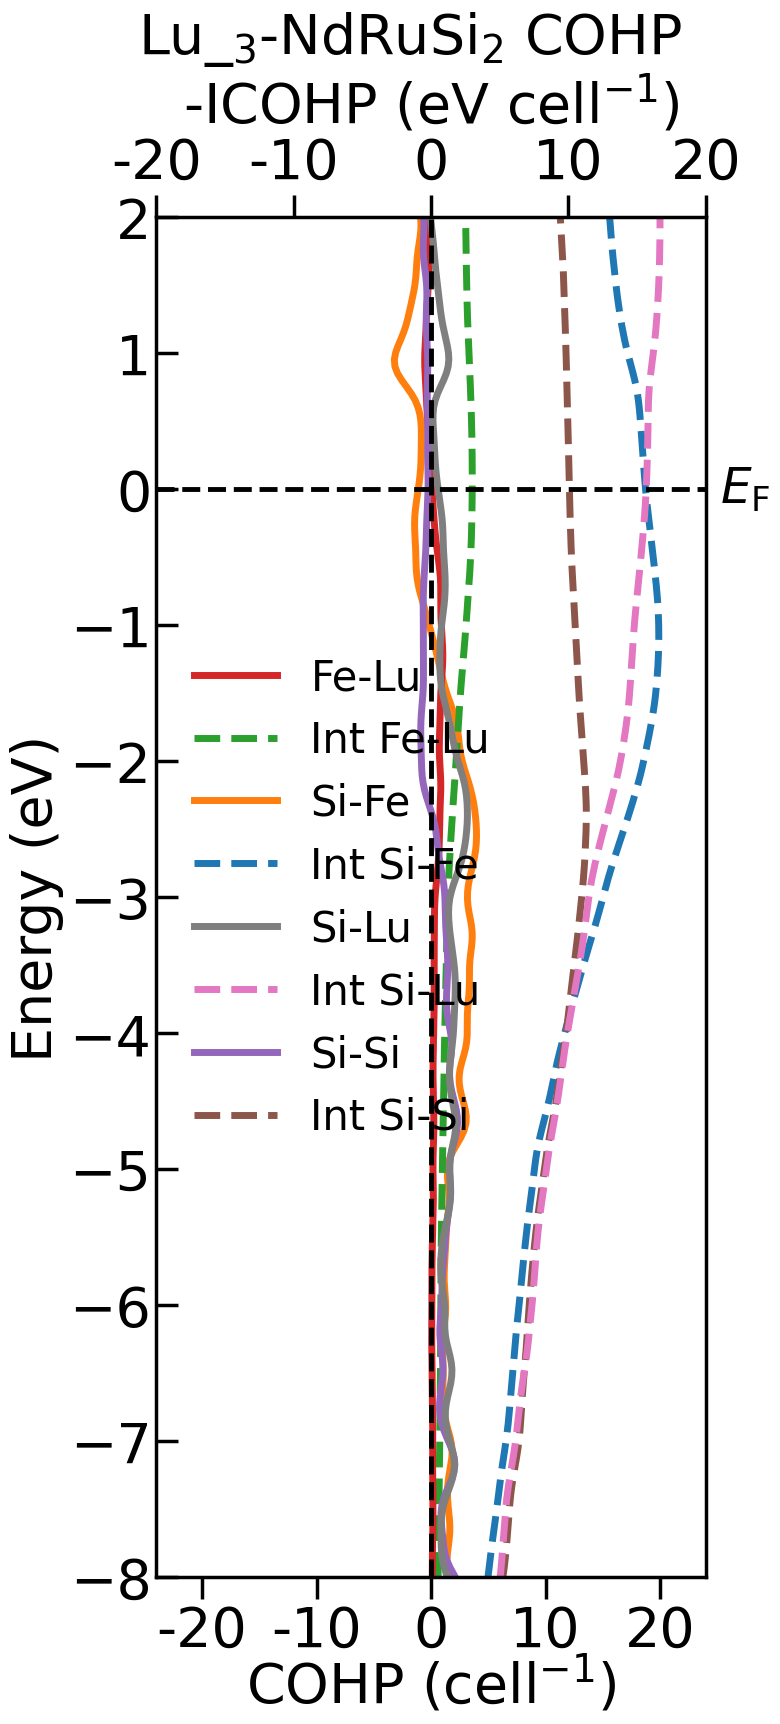

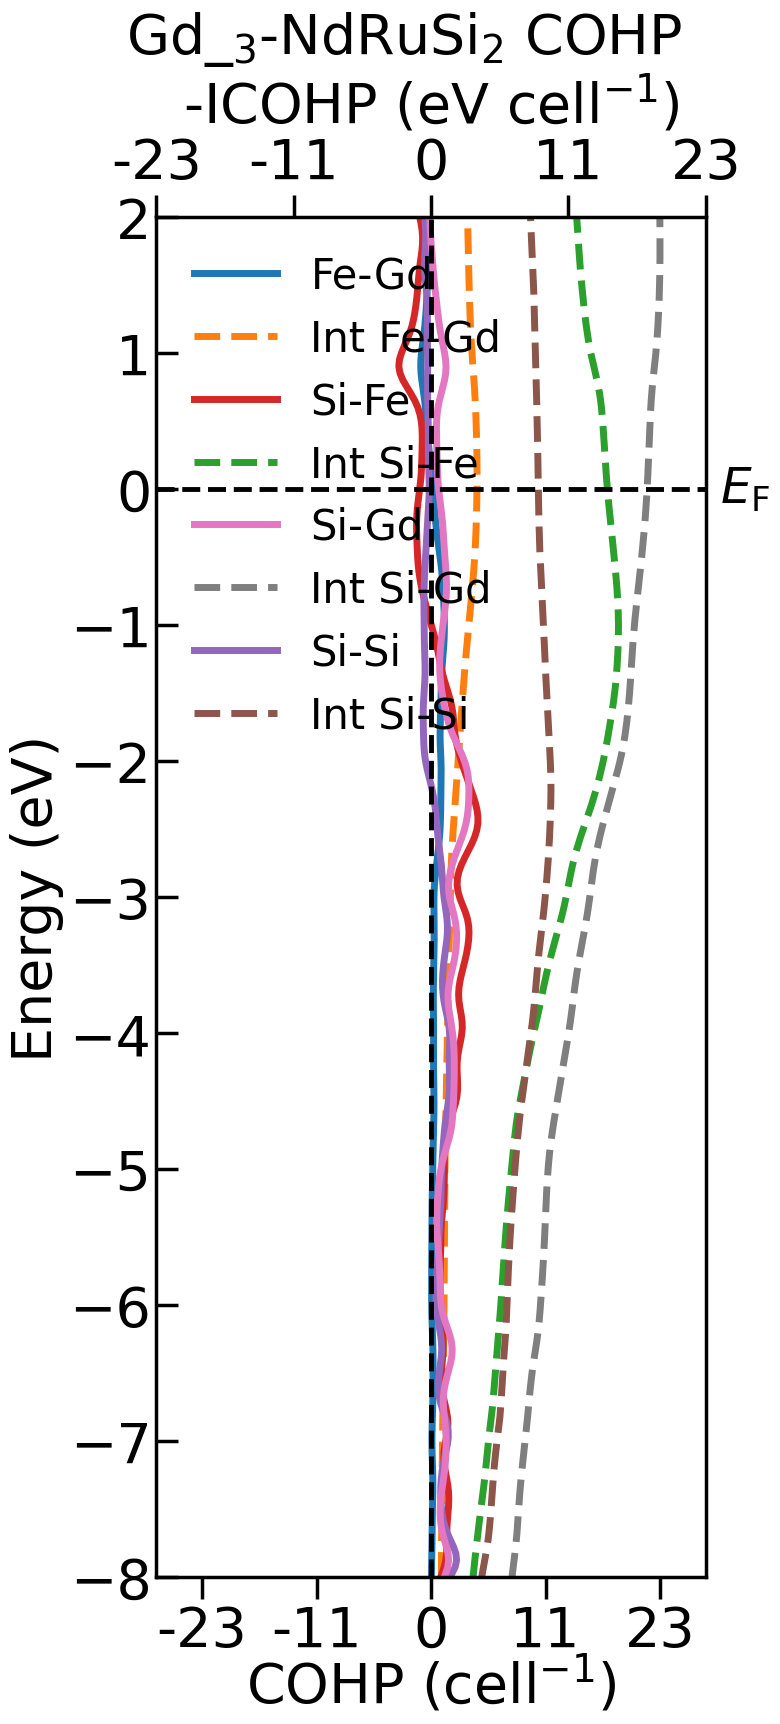

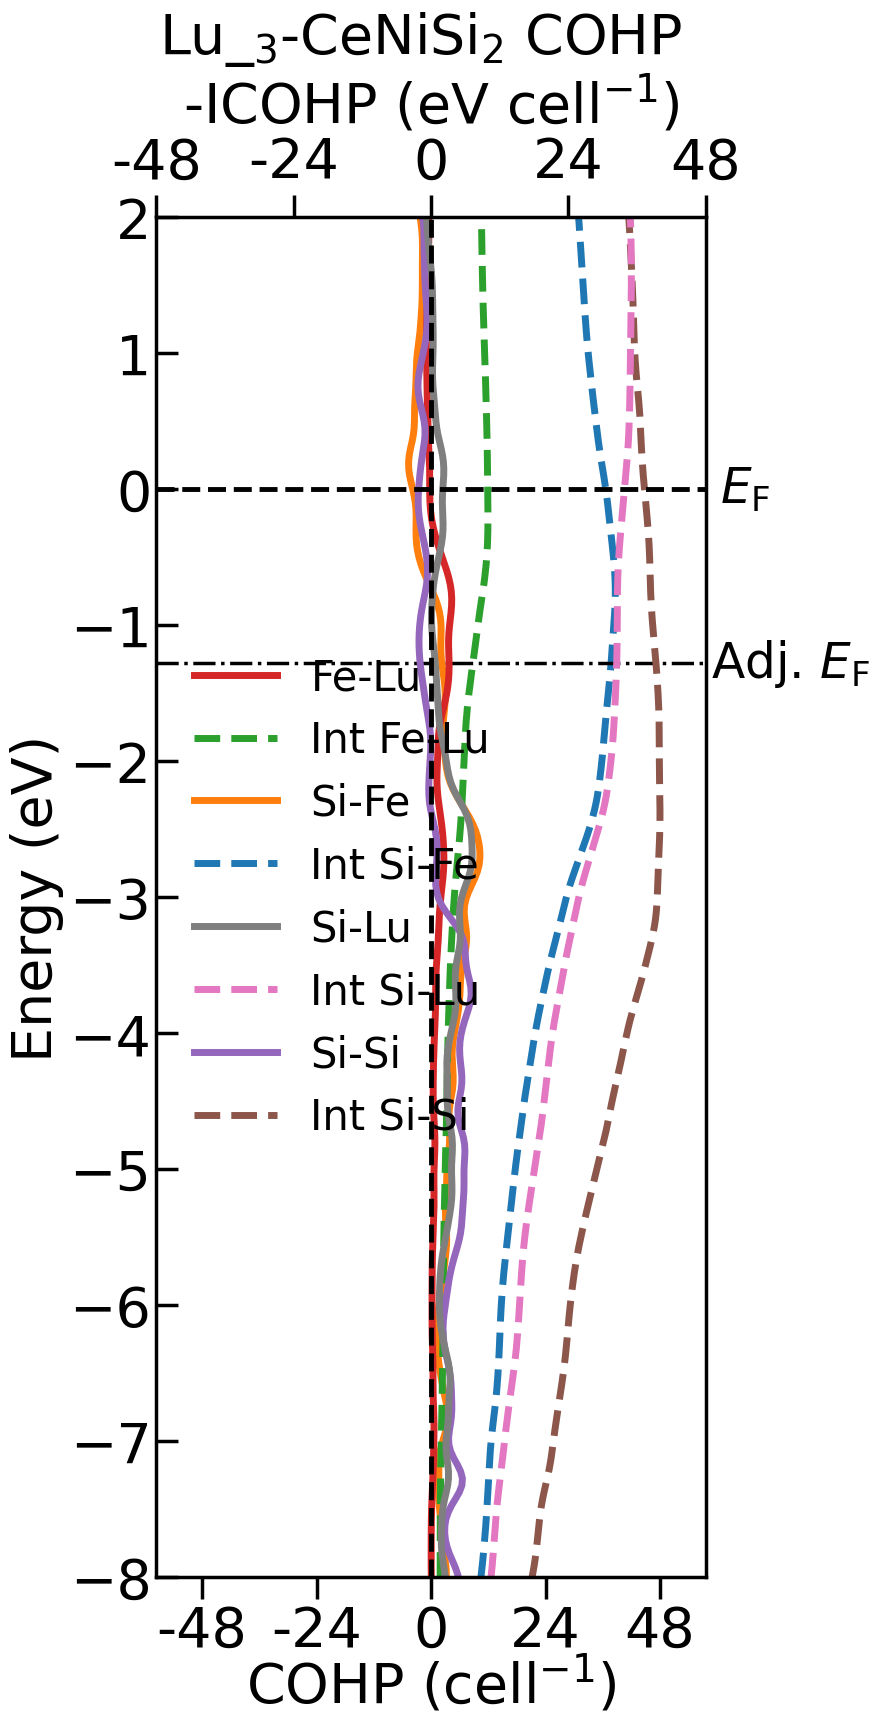

In [84]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import re
import glob

# Dictionary containing parent folder labels and corresponding values for subtraction
subtraction_values = {
    "Ce-CeNiSi2": 8.40520303,
    "Ce-LaMnSi2": 8.50746363,
    "Ce-NdRuSi2": 8.46130003,
    "La-LaMnSi2": 8.04502225,
    "La-NdRuSi2": 8.56646371,
    "La-CeNiSi2": 8.41595414,
    "Gd_3-CeNiSi2": 6.74397222,
    "Gd_3-NdRuSi2": 6.70963108,
    "Gd_3-LaMnSi2": 6.74419403,
    "Lu_3-NdRuSi2": 6.74086725,
    "Lu_3-LaMnSi2": 6.7692164,
    "Lu_3-CeNiSi2": 6.7650532,
}

def plot_cohp_contributions(directory):
    cohp_files = get_cohp_files(directory)

    fig, ax = plt.subplots(figsize=(7.85, 16))  # Create figure and axis

    all_x_values = []
    annotation_added = False  # Initialize flag to track annotation

    handles = []  # List to store legend handles
    labels = []  # List to store legend labels

    for i, filename in enumerate(cohp_files):
        # Read data from file
        data = np.loadtxt(filename)

        # Get parent folder name for subtraction
        parent_folder = os.path.basename(os.path.dirname(filename))

        # Check if file starts with "Int" and multiply y-values by -1
        if os.path.basename(filename).startswith("COHP-Int"):
            data[:, 1] *= -1

        # Subtract corresponding value from y-values
        y = data[:, 1]
        
        if parent_folder in subtraction_values:
            y -= subtraction_values[parent_folder]

        # Collect x-values within the specified y-axis range for dynamic x-axis limits
        x = data[:, 0]
        valid_indices = (y >= -8) & (y <= 2)
        all_x_values.extend(x[valid_indices])

        # Plot the data on the same axis with default colors
        file_name = os.path.splitext(os.path.basename(filename))[0]
        if 'Int' in file_name:
            line, = ax.plot(x, y, label=file_name.replace('COHP-', ''), linestyle='--', linewidth=5)  # Set line width to 5 for dashed lines
        else:
            line, = ax.plot(x, y, label=file_name.replace('COHP-', ''), linewidth=5)  # Set line width to 5 for solid lines
        handles.append(line)  # Append handle to list
        labels.append(file_name.replace('COHP-', ''))  # Append label to list

        # Additional conditions for horizontal lines and text annotations
        if not annotation_added:
            if parent_folder == "Gd_3-CeNiSi2":
                ax.axhline(-0.5645858, color='black', linestyle='-.', linewidth=2.5)
                ax.text(1.01, -0.5645858, 'Adj. $E_{\mathrm{F}}$', fontsize=35, va='center', ha='left',
                        transform=ax.get_yaxis_transform(), color='black')
                annotation_added = True
            elif parent_folder == "Lu_3-LaMnSi2":
                ax.axhline(-1.0402164, color='black', linestyle='-.', linewidth=2.5)
                ax.text(1.01, -1.0402164, 'Adj. $E_{\mathrm{F}}$', fontsize=35, va='center', ha='left',
                        transform=ax.get_yaxis_transform(), color='black')
                annotation_added = True
            elif parent_folder == "Lu_3-CeNiSi2":
                ax.axhline(-1.2770532, color='black', linestyle='-.', linewidth=2.5)
                ax.text(1.01, -1.2770532, 'Adj. $E_{\mathrm{F}}$', fontsize=35, va='center', ha='left',
                        transform=ax.get_yaxis_transform(), color='black')
                annotation_added = True

    # Determine the maximum absolute x-value within the y-limits
    max_x = max(abs(min(all_x_values)), abs(max(all_x_values)))

    # Plot a line at y=0 and x=0
    ax.axhline(0, color='black', linestyle='--', linewidth=3.5)
    ax.axvline(0, color='black', linestyle='--', linewidth=3.5)
    ax.set_xlabel('COHP (cell$^{-1}$)', fontsize=40, labelpad=5)  # Set font size for x-axis label and adjust label position at the bottom
    ax.xaxis.set_label_coords(0.5, -0.055)  # Adjust the position of the x-axis label at the bottom

    ax2 = ax.twiny()  # Create a secondary x-axis at the top
    ax2.set_xlabel('-ICOHP (eV cell$^{-1}$)', fontsize=40, labelpad=5)  # Set font size for x-axis label and adjust label position at the top
    ax2.xaxis.set_label_coords(0.5, 1.07)  # Adjust the position of the x-axis label at the top

    # Set x-axis ticks for both axes
    ax.set_xticks([-max_x, -max_x / 2, 0, max_x / 2, max_x])
    ax2.set_xticks([-max_x, -max_x / 2, 0, max_x / 2, max_x])  # Add ticks to the top axis

    # Set tick labels for bottom x-axis
    ax.set_xticklabels([f'{int(-max_x)}', f'{int(-max_x / 2)}', '0', f'{int(max_x / 2)}', f'{int(max_x)}'], fontsize=40)
    # Set tick labels for top x-axis
    ax2.set_xticklabels([f'{int(-max_x)}', f'{int(-max_x / 2)}', '0', f'{int(max_x / 2)}', f'{int(max_x)}'], fontsize=40)

    # Set font size for ticks
    ax.tick_params(axis='y', labelsize=40, direction='in', width=2.5, length=16)  # Set y-axis ticks inside with width=2.5
    ax2.tick_params(axis='x', labelsize=40, direction='out', width=2.5, length=16)  # Set x-axis ticks outside with width=2.5
    ax.tick_params(axis='x', labelsize=40, direction='out', width=2.5, length=16)  # Set x-axis ticks outside with width=2.5

    ax.set_ylabel('Energy (eV)', fontsize=40)  # Set font size for y-axis label
    ax.set_title("", fontsize=50, pad=5)  # Set an empty title to remove file name
    ax.set_xlim(-max_x * 1.2, max_x * 1.2)  # Set the x-axis limits dynamically
    ax.set_ylim(-8, 2)  # Set the y-axis limits
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))  # Show only whole numbers on y-axis

    # Sort labels and handles
    sorted_labels_handles = sorted(zip(labels, handles), key=lambda x: (x[0].replace('Int ', ''), 'Int ' in x[0]))

    # Unzip the sorted labels and handles
    sorted_labels, sorted_handles = zip(*sorted_labels_handles)

    # Add legend to the plot with Int dashed
    legend = ax.legend(sorted_handles, sorted_labels, frameon=False, fontsize=30)  # Remove legend frame
    for line in legend.get_lines():
        if 'Int' in line.get_label():  # Check if the label contains 'Int'
            line.set_linestyle('--')  # Set linestyle to dashed

    # Add common title on the top
    folder_name = os.path.basename(directory)
    folder_name_subscripted = re.sub(r'(\d+)', lambda x: r'$_\mathrm{' + x.group(0) + r'}$', folder_name)
    plt.suptitle(folder_name_subscripted + ' COHP', fontsize=40, y=1.08, ha='right', x=.82)

    # Add E_F annotation outside the plot to the right
    ax.annotate(r'$E_{\mathrm{F}}$', xy=(1, .8), xytext=(10, 0), xycoords='axes fraction', textcoords='offset points', fontsize=35, va='center', ha='left', color='black')

    # Adjust the layout manually
    plt.subplots_adjust(left=0.15, right=0.85, top=0.95, bottom=0.1)

    ax.spines['top'].set_linewidth(2.5)
    ax.spines['bottom'].set_linewidth(2.5)
    ax.spines['left'].set_linewidth(2.5)
    ax.spines['right'].set_linewidth(2.5)

    plt.show()

    # Save the plot as PNG based on folder name with a custom filename
    output_filename = os.path.join(os.path.expanduser('~'), 'Desktop/REFeSi2/Graphs/COHP', folder_name + ".png")
    fig.savefig(output_filename, bbox_inches='tight')

def get_cohp_files(directory):
    # Use glob to find all files starting with "COHP-" in the specified directory
    cohp_files = glob.glob(os.path.join(directory, 'COHP-*'))
    return cohp_files

def plot_all_directories(base_directory):
    for folder in os.listdir(base_directory):
        folder_path = os.path.join(base_directory, folder)
        if os.path.isdir(folder_path) and folder != "Graphs":
            plot_cohp_contributions(folder_path)

if __name__ == "__main__":
    desktop_directory = os.path.expanduser("~/Desktop")
    structures_directory = os.path.join(desktop_directory, "REFeSi2")

    plot_all_directories(structures_directory)
